# Actividad 1
# Laboratorio: Árboles y random forest para regresión y clasificación
## Autor: Pedro Alejandro González Morales

# Objetivo

Aplicar Árboles (DT) y Random forest (RF) para un problema de regresión y uno de clasificación, esto es, predecir el precio de venta y el rango de precio del inmueble.

# Módulos 

In [1]:
# Manipular datos
import pandas as pd
import numpy as np

# Pintar datos
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Árboles
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor      # DT
from sklearn.ensemble import RandomForestRegressor  # RF

from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Extra
from sklearn import tree
import graphviz
from sklearn import preprocessing

# Análisis descriptivo de los datos 

In [2]:
# Leemos los datos y mostramos información de las primeras filas
houseData = pd.read_csv('housing_train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Revisamos el número de filas y columnas para saber si se ha cargado completo el fichero,
# especialmente delicado en ficheros grandes, o para conocer si hay algún error en alguna linea
# Nuestro dataset tiene 1460 datos con 81 características según el distribuidor del mismo.
print(houseData.shape) #houseData.shape

(1460, 81)


In [4]:
# Mostramos el nombres de las características 
houseData.columns # nombre de las columnas

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# Obtenemos información sobre cada una de las características.
# Comprobamos si:
# - hay valores nulos
# - son de tipo numérico (int, float)
# - son de tipo categórico/objeto (str)
# No muestra si hay NaN
houseData.info() # con este comando veremos información general del DF, podemos inferir si hay valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Obtenemos, para cada variable numérica (81 - 43 = 38), las estadísticas básicas.
# count: número de valores válidos
# mean: media
# std: desviación estándar,
# min: valor mínimo median
# Cuartiles: son valores que dividen una muestra de datos en cuatro partes iguales. 
#            Utilizando cuartiles se puede evaluar rápidamente la dispersión y la 
#            tendencia central de un conjunto de datos.
# max: máximo
pd.set_option('display.max_columns', 81 ) # Imprimimos todas las columnas
houseData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Obtenemos para todas las variables una estadística, el tipo de datos, cuantos hay perdidos (NaN) y su porcentaje

df1 = houseData.describe(include = 'all')

df1.loc['dtype'] = houseData.dtypes                  # Tipo de dato
df1.loc['size'] = len(houseData)                     # Tamaño
df1.loc['% count'] = houseData.isnull().mean()*100   # Porcentaje de perdidos?
df1.loc['missing'] = houseData.isnull().sum()        # Datos perdidos

df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.0,1460.0,1460,1201.0,1460.0,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.0,1460.0,1460.0,1460.0,1460,1460,1460,1460,1452,1452.0,1460,1460,1460,1423,1423,1422,1423,1460.0,1422,1460.0,1460.0,1460.0,1460,1460,1460,1459,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460,1460.0,1460,1460.0,770,1379,1379.0,1379,1460.0,1460.0,1379,1379,1460,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,7,281,54,1460.0,1460.0,1460.0,1460,1460,1460.0
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.5,56.89726,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.95411,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.19589
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.0,20.0,NaN,21.0,1300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1872.0,1950.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,334.0,0.0,0.0,334.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,NaN,0.0,NaN,NaN,1900.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,1.0,2006.0,NaN,NaN,34900.0
25%,365.75,20.0,NaN,59.0,7553.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,1954.0,1967.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,223.0,795.75,NaN,NaN,NaN,NaN,882.0,0.0,0.0,1129.5,0.0,0.0,1.0,0.0,2.0,1.0,

In [8]:
m=houseData['SalePrice'] >= 501000
houseData['SalePrice'][m].count()

9

In [9]:
# Elementos categoricos y su frecuencia
obj=houseData.select_dtypes("object")
obj_names=obj.columns
for cols in obj_names:
    print(houseData[cols].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype:

[Text(0.5, 0, 'Id'),
 Text(1.5, 0, 'MSSubClass'),
 Text(2.5, 0, 'LotFrontage'),
 Text(3.5, 0, 'LotArea'),
 Text(4.5, 0, 'OverallQual'),
 Text(5.5, 0, 'OverallCond'),
 Text(6.5, 0, 'YearBuilt'),
 Text(7.5, 0, 'YearRemodAdd'),
 Text(8.5, 0, 'MasVnrArea'),
 Text(9.5, 0, 'BsmtFinSF1'),
 Text(10.5, 0, 'BsmtFinSF2'),
 Text(11.5, 0, 'BsmtUnfSF'),
 Text(12.5, 0, 'TotalBsmtSF'),
 Text(13.5, 0, '1stFlrSF'),
 Text(14.5, 0, '2ndFlrSF'),
 Text(15.5, 0, 'LowQualFinSF'),
 Text(16.5, 0, 'GrLivArea'),
 Text(17.5, 0, 'BsmtFullBath'),
 Text(18.5, 0, 'BsmtHalfBath'),
 Text(19.5, 0, 'FullBath'),
 Text(20.5, 0, 'HalfBath'),
 Text(21.5, 0, 'BedroomAbvGr'),
 Text(22.5, 0, 'KitchenAbvGr'),
 Text(23.5, 0, 'TotRmsAbvGrd'),
 Text(24.5, 0, 'Fireplaces'),
 Text(25.5, 0, 'GarageYrBlt'),
 Text(26.5, 0, 'GarageCars'),
 Text(27.5, 0, 'GarageArea'),
 Text(28.5, 0, 'WoodDeckSF'),
 Text(29.5, 0, 'OpenPorchSF'),
 Text(30.5, 0, 'EnclosedPorch'),
 Text(31.5, 0, '3SsnPorch'),
 Text(32.5, 0, 'ScreenPorch'),
 Text(33.5, 0, 'Poo

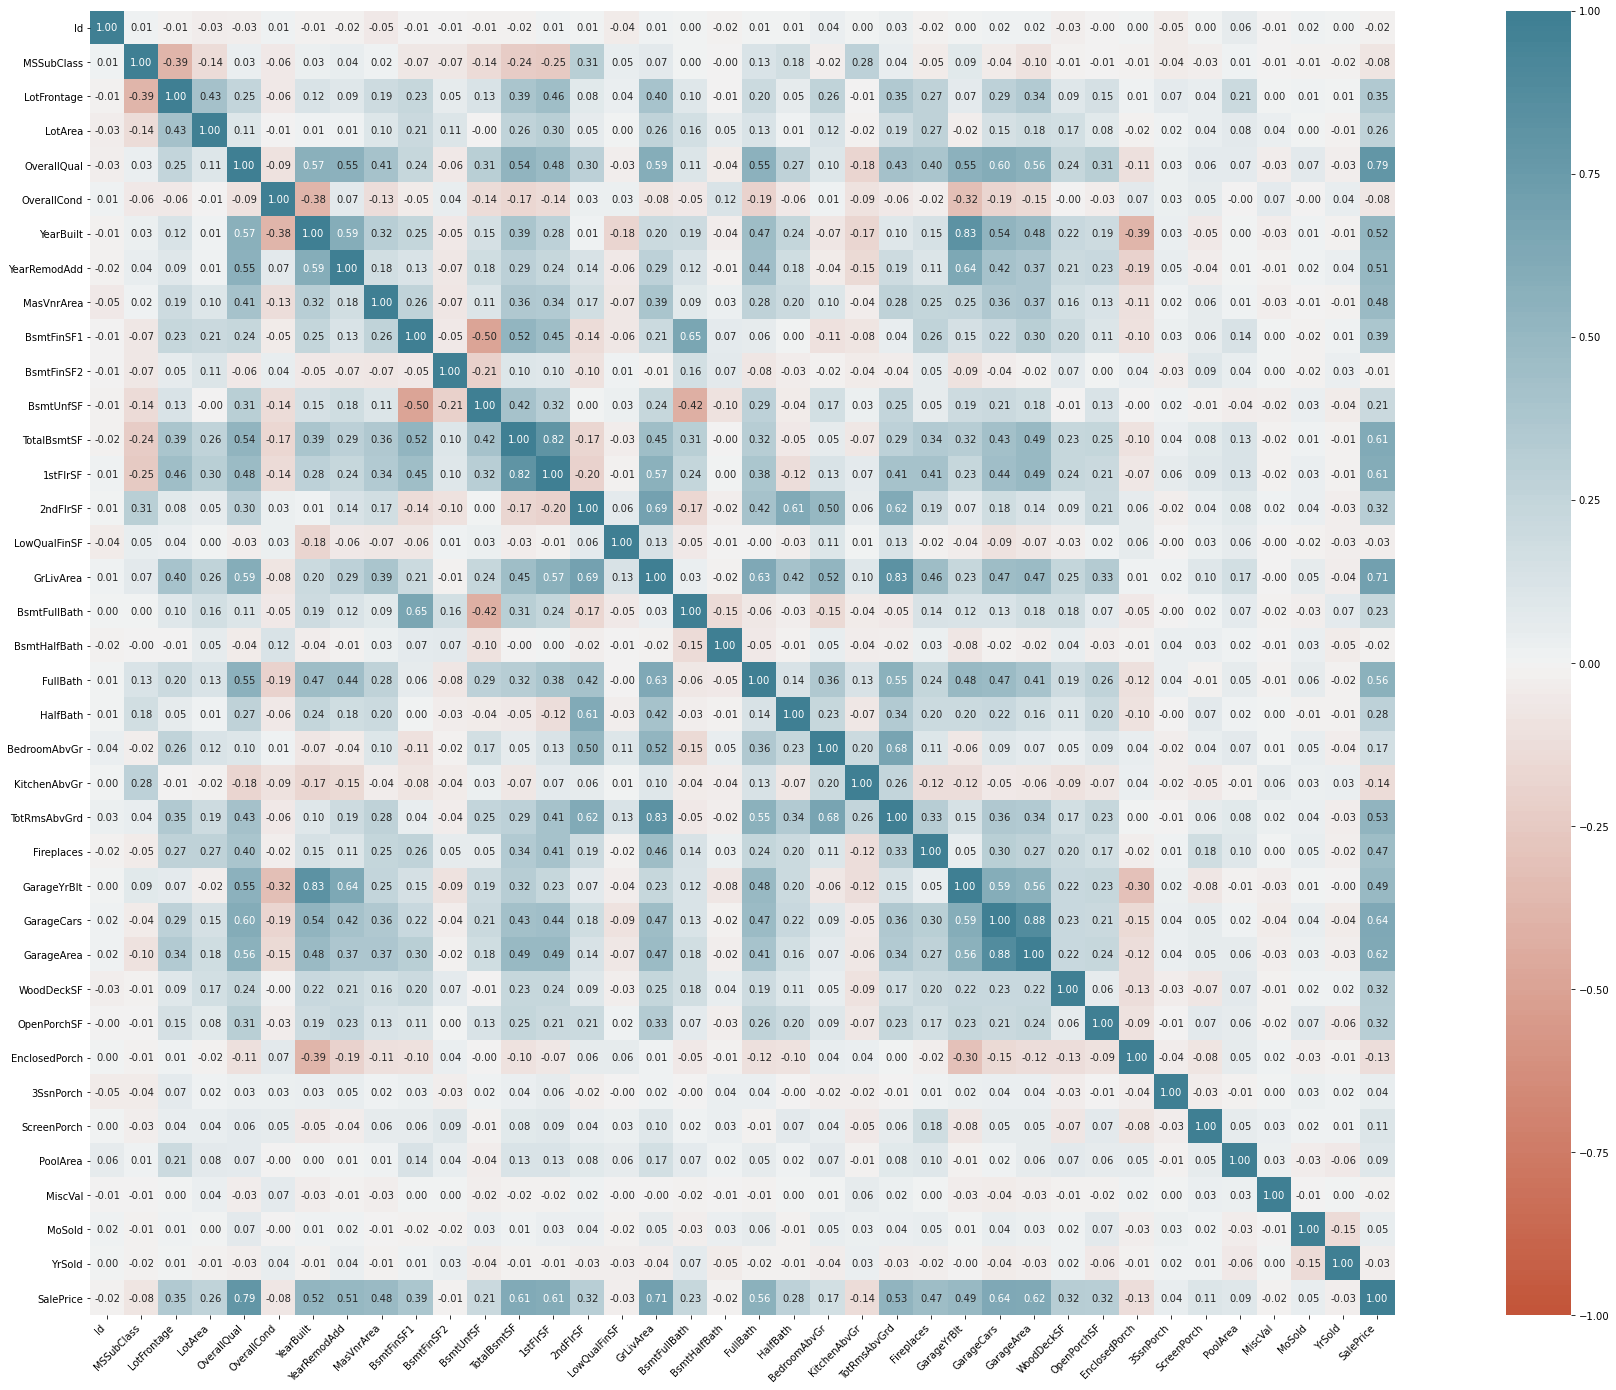

In [10]:
# Vamos a estudiar las correlaciones para entender las variables
# Calcula coeficiente de correlación de Pearson
corr = houseData.corr(method ='pearson') #por defecto Pearson ¿existe relación lineal entre variables?

# HeatMap con tamaño ampliado, cuadrado, divergencia con colores y con anotaciones de 2 decimales
plt.figure(figsize=(40,24))
ax = sns.heatmap(
 corr,
 vmin=-1, vmax=1, center=0,
 cmap=sns.diverging_palette(20, 220, n=200),
 square=True, annot=True, fmt=".2f"
)
# Rota las etiquetas del eje horizontal
ax.set_xticklabels(
 ax.get_xticklabels(),
 rotation=45,
 horizontalalignment='right'
)

In [11]:
# Mostramos solo las etiqueta que tienen valores perdidos y cuantos hay  
names = houseData.columns
ndat = 1460 
for col in names:
    nulos = np.where(pd.isnull(houseData[col]))
    #print(len(nulos[0]))
    nnulls = len(nulos[0])
    perc  = nnulls * 100/ndat
    if nnulls != 0: 
        print(col,': %s --> %2.2f %%' % (nnulls,perc))

LotFrontage : 259 --> 17.74 %
Alley : 1369 --> 93.77 %
MasVnrType : 8 --> 0.55 %
MasVnrArea : 8 --> 0.55 %
BsmtQual : 37 --> 2.53 %
BsmtCond : 37 --> 2.53 %
BsmtExposure : 38 --> 2.60 %
BsmtFinType1 : 37 --> 2.53 %
BsmtFinType2 : 38 --> 2.60 %
Electrical : 1 --> 0.07 %
FireplaceQu : 690 --> 47.26 %
GarageType : 81 --> 5.55 %
GarageYrBlt : 81 --> 5.55 %
GarageFinish : 81 --> 5.55 %
GarageQual : 81 --> 5.55 %
GarageCond : 81 --> 5.55 %
PoolQC : 1453 --> 99.52 %
Fence : 1179 --> 80.75 %
MiscFeature : 1406 --> 96.30 %


# Elementos faltantes y características no relevantes
En este caso, no es conveniente rellenar los valores de las características faltantes ya que estan influyen en el precio de venta de la casa por aparación u omisión. Es decir, si a una casa le falta piscina no podemos sustituirlo por un valor medio o usando los vecinos próximos. Lo que si podemos hacer es poner a cero esos campos para tratarlos numericamente.

In [12]:
houseData=houseData.fillna(0)

Además, vista la matriz de correlación podemos eliminar algunas columnas (características) que no aportan información.

In [13]:
# Id no aporta información adicional
# TotalBsmtSF se obtiene como suma de otras variables
# GarageCars es una conversión, no aporta información adicional
houseData = houseData.drop(columns=['Id','TotalBsmtSF','GarageCars'])
# Ademas, en base a la matriz de correlación podemos eliminar variables con correlación
# próxima a cero
houseData = houseData.drop(columns=['MSSubClass','OverallCond','BsmtFinSF2',
                                    'LowQualFinSF','BsmtHalfBath','3SsnPorch',
                                    'ScreenPorch','PoolArea','MiscVal','MoSold','YrSold'])

# Árboles de desición

In [14]:
# Árboles de decisión --> https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

# Antes de introducir las variables en el árbol de desición, debemos convertir las variables categoricas a numericas
houseData = pd.get_dummies(houseData)

# Normalización de los datos
#x = houseData.values # Un array de NumPy
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#houseData = pd.DataFrame(x_scaled)

# Separamos el conjunto de entrenamiento (train) y prueba (test) en una proporción 70 - 30
x_train, x_test, y_train, y_test = train_test_split(houseData,houseData.SalePrice,test_size = 0.30 ,random_state = 2)

print('Training X Shape:', x_train.shape)
print('Training Y Shape:', y_train.shape)
print('Testing  x Shape:', x_test.shape)
print('Testing  y Shape:', y_test.shape)

Training X Shape: (1022, 292)
Training Y Shape: (1022,)
Testing  x Shape: (438, 292)
Testing  y Shape: (438,)


In [15]:
# Buscamos los mejores parámetros para el árbol de desición (DT)
dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,2),'min_samples_leaf':np.arange(2,15)}

gs_dt = GridSearchCV(dt,dt_params,cv=3)
gs_dt.fit(x_train,y_train)
a = gs_dt.best_params_ 

# Mejores parametros para el DT
print('Mejores Parametros',a)

Mejores Parametros {'max_depth': 7, 'min_samples_leaf': 2}


In [16]:
# Entrenamos con los parámetros
dtr = DecisionTreeRegressor(random_state = 0, max_depth=7,min_samples_leaf=2)
model_dt = dtr.fit(x_train,y_train)
y_pred_dt = model_dt.predict(x_test)

In [17]:
# Métricas para el DT 
mae_dt   = mean_absolute_error(y_pred_dt,y_test)
mse_dt   = mean_squared_error(y_pred_dt,y_test)
rmse_dt  = np.sqrt(mse_dt)
msle_dt  = mean_squared_log_error(y_pred_dt,y_test)
rmsle_dt = np.sqrt(msle_dt)

print('MAE:',mae_dt)
print('MSE:',mse_dt)
print('RMSE:',rmse_dt)
print('RMLSE:',rmsle_dt)

MAE: 1259.768835142091
MSE: 26843093.706100207
RMSE: 5181.032108190433
RMLSE: 0.012045318382108436


 # Random Forest

In [18]:
# Iniciamos el modelo RF, usamos 1500 DT con los mismos parámetros que el DT anterior
rf = RandomForestRegressor(n_estimators = 100, random_state = 0, 
                           max_depth=7,min_samples_leaf=2)

# Entrenamos
model_rf = rf.fit(x_train, y_train)

# Usamos el modelo obtenido para predecir valores usando los datos de prueba
y_pred_rf = model_rf.predict(x_test)

In [19]:
# Métricas para el RF
mae_rf   = mean_absolute_error(y_pred_rf,y_test)
mse_rf   = mean_squared_error(y_pred_rf,y_test)
rmse_rf  = np.sqrt(mse_rf)
msle_rf  = mean_squared_log_error(y_pred_rf,y_test)
rmsle_rf = np.sqrt(msle_rf)

print('MAE:',mae_rf)
print('MSE:',mse_rf)
print('RMSE:',rmse_rf)
print('RMLSE:',rmsle_rf)

MAE: 902.5048695665142
MSE: 41721931.97597818
RMSE: 6459.251657582183
RMLSE: 0.011638707326174811


A la vista de estos resultados, podemos decir que el método DT comete un error menor que el método RF. Esto puede ser debido a que para DT hemos buscado los parámetros óptimos y para RF hemos usado unos parámetros cualesquiera.

La diferencia entre los valores aquí obtenidos y los ofrecidos en la actividad puede ser debida a un preprocesado de los datos erróneo por:
- Un tratamiento diferente de los valores NaN
- Diferencias al mantener o eliminar características


# Clasificación

Dividimos el precio del inmueble en 3 categorías:

- grupo1: SalePrice menor o igual a 100 000.
- grupo2: SalePrice entre 101 000 y 500 000. 
- grupo3: SalePrice mayor o igual a 501 000.

## Arbol de desición

Al aplicar árboles de decisión (DT) la matriz de confusión resultante sobre los datos de test es la siguiente:
![alt text](Matriz_Confusion_DT.png)
Donde en las columnas tenemos los valores predichos y en las filas los reales

In [20]:
# Para el grupo1 
tp = 11
fp = 10 + 0
fn = 14 + 0
tn = 255 + 0 + 2 + 0
accu_g1 = (tp + tn) / (tp + tn + fp + fn)
pre_g1 = tp / (tp + fp)
recall_g1 =  tp / ( tp + fn )
f1_g1 = (2* pre_g1 * recall_g1) / (recall_g1 + pre_g1)

# Para el grupo2 
tp = 255
fp = 14 + 2
fn = 10 + 0
tn = 11 + 0 + 0 + 0
accu_g2 = (tp + tn) / (tp + tn + fp + fn)
pre_g2 = tp / (tp + fp)
recall_g2 =  tp / ( tp + fn )
f1_g2 = (2* pre_g2 * recall_g2) / (recall_g2 + pre_g2)

# Para el grupo3 
tp = 0
fp = 0
fn = 0 + 2
tn = 11 + 14 + 10 + 255
accu_g3 = (tp + tn) / (tp + tn + fp + fn)
#pre_g2 = tp / (tp + fp)
recall_g3 =  tp / ( tp + fn )
#f1_g3 = (2* pre_g3 * recall_g3) / (recall_g3 + pre_g3)

print ('DT:')
print('Exactitud Grupo1: %s' % accu_g1)
print('Exactitud Grupo2: %s' % accu_g2)
print('Exactitud Grupo3: %s' % accu_g3)
print()
print('Presicion Grupo1: %s' % pre_g1)
print('Presicion Grupo2: %s' % pre_g2)
print('Presicion Grupo3: None')
print()
print('Recall Grupo1: %s' % recall_g1)
print('Recall Grupo2: %s' % recall_g2)
print('Recall Grupo3: %s' % recall_g3)
print()
print('F1 Grupo1: %s' % f1_g1)
print('F1 Grupo2: %s' % f1_g2)
print('F1 Grupo3: None')

DT:
Exactitud Grupo1: 0.9178082191780822
Exactitud Grupo2: 0.910958904109589
Exactitud Grupo3: 0.9931506849315068

Presicion Grupo1: 0.5238095238095238
Presicion Grupo2: 0.940959409594096
Presicion Grupo3: None

Recall Grupo1: 0.44
Recall Grupo2: 0.9622641509433962
Recall Grupo3: 0.0

F1 Grupo1: 0.4782608695652174
F1 Grupo2: 0.9514925373134329
F1 Grupo3: None


De la tabla con las medidas estadísticas sabemos que al menos hay una casa perteneciente al grupo3. Al explorar los datos, tenemos que hay 9 casas dentro de este grupo. Como nuestro clasificador no detectado ninguna caben dos posibilidades.

1. Nuestros datos de prueba (test) no incluyen ninguna casa perteneciente al grupo3.
2. El clasificador no está trabajando correctamente.

En el primer caso, deberíamos revisar los datos de prueba y comprobar que hay alguna casa perteneciente al grupo3. De no haberla podríamos cambiar ligeramente las proporciones elegidas para tratar de mejorar la separación entrenamiento/prueba y ver que ocurre. También podríamos intentar crear uno o dos valores artificiales pertenecientes al grupo3 y realizar nuevamente la validación del clasificador.

En el segundo caso, y asumiendo que tenemos suficientes datos en ambos grupos de entrenamiento/prueba, tendríamos que volver a entrenar al modelo de árbol de desición con otros parámetros o probar otro método clasificador.

## Random forest

Al aplicar random forest (RF), la matriz de confusión resultante sobre los datos de test es la siguiente:
![alt text](Matriz_Confusion_RF.png)
Donde nuevamente, en las columnas tenemos los valores predichos y en las filas los reales

In [21]:
# Para el grupo1 
tp = 13
fp = 1 + 0
fn = 11 + 0
tn = 265 + 0 + 1 + 1
accu_g1 = (tp + tn) / (tp + tn + fp + fn)
pre_g1 = tp / (tp + fp)
recall_g1 =  tp / ( tp + fn )
f1_g1 = (2* pre_g1 * recall_g1) / (recall_g1 + pre_g1)

# Para el grupo2 
tp = 265
fp = 11 + 1
fn = 1 + 0
tn = 13 + 0 + 0 + 1
accu_g2 = (tp + tn) / (tp + tn + fp + fn)
pre_g2 = tp / (tp + fp)
recall_g2 =  tp / ( tp + fn )
f1_g2 = (2* pre_g2 * recall_g2) / (recall_g2 + pre_g2)

# Para el grupo3 
tp = 1
fp = 0
fn = 0 + 1
tn = 13 + 11 + 1 + 265
accu_g3 = (tp + tn) / (tp + tn + fp + fn)
pre_g3 = tp / (tp + fp)
recall_g3 =  tp / ( tp + fn )
f1_g3 = (2* pre_g3 * recall_g3) / (recall_g3 + pre_g3)

print ('RF:')
print('Exactitud Grupo1: %s' % accu_g1)
print('Exactitud Grupo2: %s' % accu_g2)
print('Exactitud Grupo3: %s' % accu_g3)
print()
print('Presicion Grupo1: %s' % pre_g1)
print('Presicion Grupo2: %s' % pre_g2)
print('Presicion Grupo3: %s' % pre_g3)
print()
print('Recall Grupo1: %s' % recall_g1)
print('Recall Grupo2: %s' % recall_g2)
print('Recall Grupo3: %s' % recall_g3)
print()
print('F1 Grupo1: %s' % f1_g1)
print('F1 Grupo2: %s' % f1_g2)
print('F1 Grupo3: %s' % f1_g3)

RF:
Exactitud Grupo1: 0.958904109589041
Exactitud Grupo2: 0.9554794520547946
Exactitud Grupo3: 0.9965753424657534

Presicion Grupo1: 0.9285714285714286
Presicion Grupo2: 0.9566787003610109
Presicion Grupo3: 1.0

Recall Grupo1: 0.5416666666666666
Recall Grupo2: 0.9962406015037594
Recall Grupo3: 0.5

F1 Grupo1: 0.6842105263157894
F1 Grupo2: 0.9760589318600369
F1 Grupo3: 0.6666666666666666


Vistos estos resultados podemos decir que nuestro clasificador RF funciona mejor que el clasificador basado en DT, especialmente en la clasificación del grupo1 y grupo3.

Ambos clasificadores tienes una alta exactitud, sin embargo el clasificador DT tiene una presición y Recall bajos en el grupo1 respecto al clasificador RF y problemas para detectar el grupo3. Esto se ve claramente reflejado en la métrica F1. 